In [24]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

## Set up parameters, create isochrone grid

In [25]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [26]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma1p0/fiducial/sfe_ff100/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 1.5)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass        isMultiple        compMass            systemMass             e                log_a               age        
------------------- ---------- --------------------- ------------------- ------------------ ------------------ ------------------
  56.24521950614411        0.0                    []   56.24521950614411                nan                nan  1.494411190854979
0.11411525852041825        0.0                    [] 0.11411525852041825                nan                nan 1.5011385289993755
  12.96283688892593        0.0                    []   12.96283688892593                nan                nan 1.4970749668953602
0.27321673034539384        0.0                    [] 0.27321673034539384                nan                nan 1.4964816285263873
                ...        ...                   ...                 ...                ...                ...                ...
0.20449300038109305        1.0 [0.11248395795903553] 0.31697695834012857   0.2989732941710

In [27]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 6.172382928762329
Max log age = 6.182058450993647
Min level age = 1487246.4082493563
Max level age = 1520752.191543579


In [28]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1440
[0.16312509029104827, 0.09636490446440792, 0.03636643773183382, 0.21849298240279427, 0.03651675631669997, 0.019132423710002903, 0.05933243108388687, 0.12247264926103713, 0.6385500001324462, 0.2022302569658592, 0.07471903553293849, 0.16814292142663018, 0.0230523225129767, 0.1609042880961581, 0.2688387764755287, 0.05549755459546917, 0.012694034520736917, 0.09389877662294215, 0.024808470564410257, 0.012916016567435117, 0.537538199511473, 0.10166459547430746, 0.017003778368234634, 0.1895631651814792, 0.011007644292289143, 0.1908368021249771, 0.16246922314167023, 0.09223736189469771, 0.08370963329421344, 0.5588908545309716, 0.03431704460795354, 0.045772770042914156, 0.15501195511789118, 0.026778635366288318, 0.02533061849344048, 0.044663360767730004, 0.05472224588958281, 0.028879488831018898, 0.1309257580510967, 0.11610612932071074, 0.7052331632631441, 0.42965823402192654, 0.09028542237526906, 0.08645685263723765, 0.6922198305107939, 0.5510788138832429, 0.014685248829668424, 0.02854885

In [29]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.         6.17609126 6.30103   ]
[1000000. 1500000. 2000000.]


In [30]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=4.50 for T= 39023 logg=4.15
Changing to logg=4.50 for T= 39414 logg=4.14
Changing to logg=4.50 for T= 40077 logg=4.14
Changing to logg=4.50 for T= 40481 logg=4.13
Changing to logg=4.50 for T= 41038 logg=4.13
Changing to logg=4.50 for T= 41391 logg=4.13
Changing to logg=4.50 for T= 41709 logg=4.12
Changing to logg=4.50 for T= 42053 logg=4.12
Changing to logg=4.50 for T= 42409 logg=4.12
Changing to logg=4.50 for T= 42725 logg=4.12
Changing to logg=4.50 for T= 43048 logg=4.11
Changing to logg=4.50 for T= 43380 logg=4.11
Changing to logg=4.50 for T= 43755 logg=4.11
Changing to logg=4.50 for T= 44345 logg=4.10
Changing to logg=4.50 for T= 44940 logg=4.10
Changing to logg=4.50 for T= 45533 logg=4.09
Changing to logg=4.50 for T= 46164 logg=4.09
Changing to logg=4.50 for T= 47104 logg=4.09
Changing to logg=4.50 for T= 47885 logg=4.08
Changing to logg=4.50 for T= 48285 logg=4.08
Changing to T= 50000 for T= 50969 logg=4.10
Changing to logg=5.00 for T= 50969 logg=4.10
Changing to

Changing to T= 50000 for T= 62841 logg=4.11
Changing to logg=5.00 for T= 62841 logg=4.11
Changing to T= 50000 for T= 63294 logg=4.12
Changing to logg=5.00 for T= 63294 logg=4.12
Changing to T= 50000 for T= 63407 logg=4.13
Changing to logg=5.00 for T= 63407 logg=4.13
Changing to T= 50000 for T= 63422 logg=4.13
Changing to logg=5.00 for T= 63422 logg=4.13
Changing to T= 50000 for T= 63497 logg=4.14
Changing to logg=5.00 for T= 63497 logg=4.14
Changing to T= 50000 for T= 63662 logg=4.14
Changing to logg=5.00 for T= 63662 logg=4.14
Changing to T= 50000 for T= 63814 logg=4.15
Changing to logg=5.00 for T= 63814 logg=4.15
Changing to T= 50000 for T= 63940 logg=4.15
Changing to logg=5.00 for T= 63940 logg=4.15
Changing to T= 50000 for T= 64101 logg=4.16
Changing to logg=5.00 for T= 64101 logg=4.16
Changing to T= 50000 for T= 64219 logg=4.16
Changing to logg=5.00 for T= 64219 logg=4.16
Changing to T= 50000 for T= 64311 logg=4.16
Changing to logg=5.00 for T= 64311 logg=4.16
Changing to T= 50000 

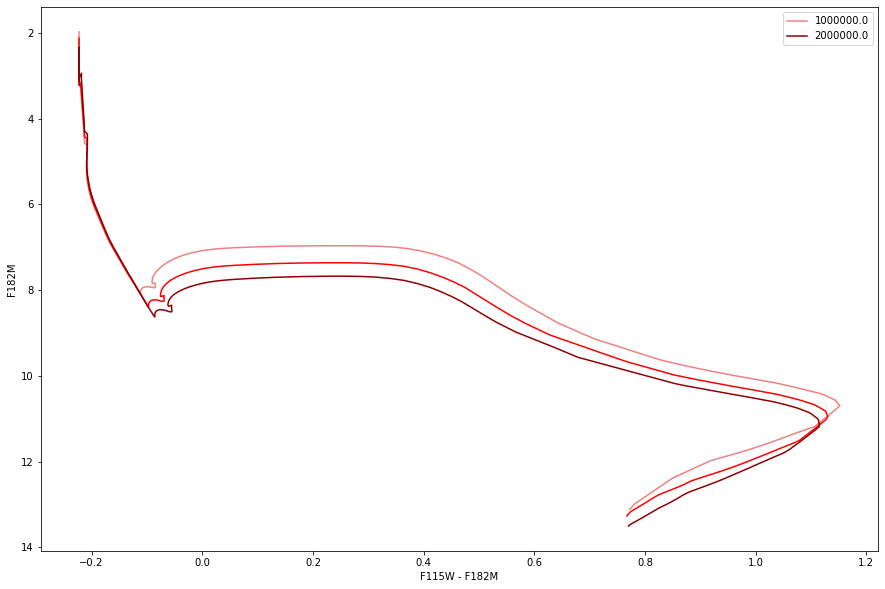

In [38]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [35]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr')
import interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
skip = [264, 334, 1822, 2863]
for i in range(len(stars)):
    if i in skip:
        continue
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)

# convert luminosity values to solar luminosities
for i in range(len(stars)):
    if i in skip:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun

# print(stars)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# perform interpolation on companion stars
companions = np.empty(len(compMasses), dtype=object)

for i in range(len(companions)):
    if (i + first_binary) in skip:
        continue
    companions[i] = interpolator.interpolate(level_ages_myr[i + first_binary], compMasses[i], instances, log_age_arr, filters)

for i in range(len(companions)):
    if (i + first_binary) in skip:
        continue
    companions[i][0] = companions[i][0] * watts_to_lsun

In [ ]:
# combine magnitudes on binary stars
unresolved_binaries = np.empty(len(companions), dtype=object)

for i in range(len(companions)):
    if (i + first_binary) in skip:
        continue
        
    flux11 = np.power(10, stars[i + first_binary][3] / -2.5) * 3.6e-8
    flux21 = np.power(10, companions[i][3] / -2.5) * 3.6e-8
    mag1 = -2.5 * np.log10((flux11 + flux21) / 3.6e-8)
    
    flux12 = np.power(10, stars[i + first_binary][4] / -2.5) * 3.6e-8
    flux22 = np.power(10, companions[i][4] / -2.5) * 3.6e-8
    mag2 = -2.5 * np.log10((flux12 + flux22) / 3.6e-8)
    
    unresolved_binaries[i] = [mag1, mag2]

print(unresolved_binaries)

In [ ]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(0, first_binary):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
for i in range(len(unresolved_binaries)):
    if (i + first_binary) in skip:
        continue
    py.plot(unresolved_binaries[i][0] - unresolved_binaries[i][1], unresolved_binaries[i][1], marker='o', markersize=1, color='k')

# Plot HR
py.subplot(1, 2, 2)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')

py.xscale('log')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()
py.legend()

for i in range(len(stars)):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][1], stars[i][0], marker='o', markersize=1, color='k')